# Pearson Correlations

We compute all Pearson Correlation between a 2-by2-comination of all predictors and between the outcome (SMB) and all predictors. The folling variables correlate highly (>|0.7|). 'Zmin','Zmax','Lmax','tstar_ela_h','debris_vol_ela_p','temp_mean_1980-2000','prcp_mean_1980_2000','Area','velocity_mean','ice_thickness'. 

## Loading the data

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/df')
df = df.iloc[: , 1:]

In [6]:
rgi13 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_13_rgi60_CentralAsia/13_rgi60_CentralAsia.shp')
rgi14 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_14_rgi60_SouthAsiaWest/14_rgi60_SouthAsiaWest.shp')
rgi15 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_15_rgi60_SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')

In [7]:
# rgi_concat = pd.concat([rgi13,rgi14,rgi15],ignore_index=True)
rgi13 = rgi13.rename(columns={"RGIId": "rgi_id"})
rgi13 = rgi13[rgi13['Area'] > 2]
rgi13 = rgi13[['rgi_id']]
rgi13 = pd.DataFrame(rgi13)

rgi14 = rgi14.rename(columns={"RGIId": "rgi_id"})
rgi14 = rgi14[rgi14['Area'] > 2]
rgi14 = rgi14[['rgi_id']]
rgi14 = pd.DataFrame(rgi14)

rgi15 = rgi15.rename(columns={"RGIId": "rgi_id"})
rgi15 = rgi15[rgi15['Area'] > 2]
rgi15 = rgi15[['rgi_id']]
rgi15 = pd.DataFrame(rgi15)

In [8]:
df13 = df.merge(rgi13,on='rgi_id',how='inner')
df14 = df.merge(rgi14,on='rgi_id',how='inner')
df15 = df.merge(rgi15,on='rgi_id',how='inner')

In [9]:
df13_1 = df13[df13['O2Region'] == 1]
df13_2 = df13[df13['O2Region'] == 2]
df13_3 = df13[df13['O2Region'] == 3]
df13_4 = df13[df13['O2Region'] == 4]
df13_5 = df13[df13['O2Region'] == 5]
df13_6 = df13[df13['O2Region'] == 6]
df13_7 = df13[df13['O2Region'] == 7]
df13_8 = df13[df13['O2Region'] == 8]
df13_9 = df13[df13['O2Region'] == 9]

df14_1 = df14[df14['O2Region'] == 1]
df14_2 = df14[df14['O2Region'] == 2]
df14_3 = df14[df14['O2Region'] == 3]

df15_1 = df15[df15['O2Region'] == 1]
df15_2 = df15[df15['O2Region'] == 2]
df15_3 = df15[df15['O2Region'] == 3]

In [10]:
df13_1 = df13_1.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_2 = df13_2.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_3 = df13_3.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_4 = df13_4.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_5 = df13_5.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_6 = df13_6.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_7 = df13_7.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_8 = df13_8.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df13_9 = df13_9.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums

df14_1 = df14_1.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df14_2 = df14_2.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df14_3 = df14_3.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums

df15_1 = df15_1.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df15_2 = df15_2.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums
df15_3 = df15_3.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1) #remove non numerical colums

## Pearson Correlation all glaciers HMA; 2-by-2 perdicor matrix

In [11]:
df = df.drop(['rgi_id','O2Region','glacial_lake','Aspect','dvoldt'],axis=1)

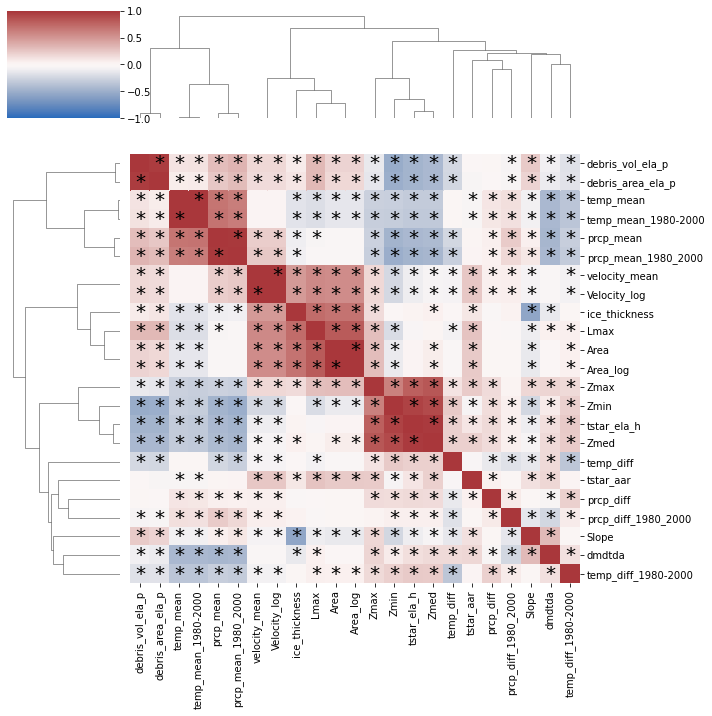

In [12]:
from sklearn.datasets import load_iris
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests



def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = spearmanr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(df)

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, cmap="vlag", vmin=-1, vmax=1)

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

# Save a high-res copy of the image to disk
plt.tight_layout()

## Pearson correlations; per subregion

# Correlations

In [18]:
#method='pearson',pval stars 0.001: '***', 0.01: '**', 0.05: '*'

In [21]:
import numpy as np
import pandas as pd
import pingouin as pg

13.1

In [15]:
df = df13_1

In [24]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,**,,,,,,,,*,,,,**,,***,,,,***,,,
tstar_aar,0.22,-,,,,,***,,,,**,***,*,,,,***,*,*,*,,,
tstar_ela_h,0.08,0.12,-,*,,,***,***,***,,***,***,*,**,,,**,,,*,*,,***
Slope,0.13,-0.02,-0.18,-,*,*,,***,***,***,,,,,,,,,,,,**,***
Lmax,-0.11,0.08,-0.13,-0.18,-,***,,***,***,***,***,***,**,,**,,*,**,,,***,***,***
Area,-0.13,0.11,-0.08,-0.18,0.88,-,,***,***,***,*,*,,,*,,,,,,**,***,***
Zmed,0.1,0.27,0.98,-0.15,-0.07,-0.02,-,***,***,,***,***,,**,,,*,,,,*,,**
Zmin,-0.03,-0.16,0.78,-0.44,-0.43,-0.3,0.7,-,,,***,***,,**,**,*,,,,*,*,***,***
Zmax,0.03,-0.02,0.43,0.3,0.47,0.32,0.46,-0.05,-,**,*,,***,,,,***,***,*,,,***,
ice_thickness,-0.19,-0.03,0.02,-0.61,0.74,0.64,0.03,-0.04,0.24,-,*,**,*,,,,*,,,,***,***,***


13.2

In [25]:
df = df13_2

In [26]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,,,***,*,***,***,,,,*,,,***,,***,*,,,*
tstar_aar,0.21,-,*,***,***,***,***,***,***,***,,*,,**,***,,***,,**,,***,***,***
tstar_ela_h,0.2,0.07,-,**,***,*,***,***,***,*,***,***,***,***,***,***,***,***,,***,***,*,***
Slope,0.33,0.28,0.09,-,,,***,***,***,***,**,,,***,,**,***,,***,***,,,
Lmax,-0.02,0.41,-0.14,-0.06,-,***,,***,***,***,***,***,***,***,**,,*,***,,,***,***,***
Area,-0.01,0.24,-0.08,-0.04,0.84,-,,***,***,***,*,*,**,**,,,,**,,,***,***,***
Zmed,0.26,0.38,0.92,0.21,0.05,0.04,-,***,***,,***,***,***,***,***,***,***,***,,***,,**,
Zmin,0.08,-0.27,0.88,-0.12,-0.42,-0.24,0.68,-,***,***,***,***,***,***,***,***,***,***,,***,***,***,***
Zmax,0.26,0.47,0.54,0.38,0.49,0.32,0.72,0.16,-,***,,,***,***,***,***,***,***,***,***,***,***,***
ice_thickness,-0.21,0.14,-0.08,-0.51,0.75,0.52,-0.01,-0.2,0.28,-,***,***,***,***,,,,***,***,,***,***,***


13.3

In [53]:
df = df13_3

In [54]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,,,***,**,***,***,**,,***,***,***,***,***,***,***,***,,,**
tstar_aar,0.36,-,***,***,***,***,***,***,***,***,***,*,***,***,***,***,,***,,***,***,***,***
tstar_ela_h,0.49,0.29,-,***,,,***,***,***,,,***,***,***,***,***,***,***,***,***,,,
Slope,0.46,0.39,0.27,-,,,***,***,***,***,***,***,***,***,***,***,***,***,,***,,,
Lmax,0.05,0.4,0.04,-0.06,-,***,***,***,***,***,***,***,***,*,***,***,,***,,***,***,***,***
Area,0.06,0.36,-0.02,0.03,0.85,-,***,***,***,***,***,***,***,,*,*,,***,,**,***,***,***
Zmed,0.52,0.52,0.93,0.34,0.23,0.19,-,***,***,**,,,***,***,***,***,***,***,***,***,***,***,***
Zmin,0.1,-0.35,0.65,-0.21,-0.38,-0.37,0.42,-,***,***,***,***,,,***,***,***,,***,***,***,***,***
Zmax,0.45,0.6,0.55,0.51,0.59,0.53,0.72,-0.13,-,***,***,***,***,***,***,***,,***,***,***,***,***,***
ice_thickness,-0.19,0.18,0.02,-0.48,0.71,0.5,0.12,-0.17,0.32,-,*,*,**,,,**,*,**,,**,***,***,***


13.4

In [58]:
df = df13_4

In [59]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,*,,***,***,***,,,,***,,,,***,***,*,,,,
tstar_aar,0.37,-,,,***,***,***,***,,*,,,***,**,***,**,*,***,*,**,**,***,*
tstar_ela_h,0.53,0.09,-,***,**,,***,***,***,,,**,***,,,***,***,***,***,***,,*,
Slope,0.45,0.05,0.54,-,***,***,***,***,***,***,,,,,,**,***,,***,**,***,***,***
Lmax,0.14,0.23,0.17,-0.22,-,***,***,**,***,***,,,**,*,,,***,**,,,***,***,***
Area,0.06,0.22,0.12,-0.28,0.86,-,*,*,***,***,,,***,,,,***,***,,,***,***,***
Zmed,0.57,0.21,0.99,0.54,0.2,0.15,-,***,***,,,**,***,,,***,***,***,***,***,,**,
Zmin,0.25,-0.21,0.84,0.37,-0.19,-0.13,0.79,-,***,***,,*,**,,,***,***,**,***,***,***,*,***
Zmax,0.48,-0.02,0.85,0.58,0.39,0.25,0.83,0.59,-,,,,*,**,,***,***,*,***,***,***,***,***
ice_thickness,-0.05,0.13,-0.06,-0.57,0.85,0.78,-0.04,-0.26,0.11,-,,,*,,,,,*,*,,***,***,***


13.5

In [60]:
df = df13_5

In [61]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,,***,***,***,***,***,***,***,***,***,***,***,,***,***,,***,,***,**,***,
tstar_aar,0.05,-,***,,***,***,*,***,***,***,***,***,***,,***,***,*,***,***,***,***,***,***
tstar_ela_h,-0.4,-0.14,-,***,*,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,,**,
Slope,0.29,0.03,-0.36,-,***,***,***,***,*,***,***,***,***,***,***,***,*,***,*,***,***,***,***
Lmax,-0.27,0.43,0.09,-0.4,-,***,***,***,***,***,,,***,*,,,,***,***,*,***,***,***
Area,-0.27,0.24,0.14,-0.36,0.85,-,***,,***,***,,,***,*,*,***,,***,**,***,***,***,***
Zmed,-0.4,0.08,0.96,-0.35,0.19,0.19,-,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***,***
Zmin,-0.35,-0.44,0.89,-0.42,-0.19,-0.04,0.78,-,***,*,***,***,***,***,***,***,*,***,**,***,**,**,***
Zmax,-0.35,0.2,0.73,-0.09,0.41,0.33,0.81,0.44,-,***,***,***,***,***,***,***,**,***,***,***,***,***,***
ice_thickness,-0.33,0.21,0.24,-0.69,0.81,0.68,0.28,0.09,0.34,-,***,***,***,***,***,***,,***,**,***,***,***,***


13.6

In [62]:
df = df13_6

In [63]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,,***,***,,*,***,***,***,***,**,**,,***,,***,,,***,***,,*,
tstar_aar,0.03,-,,**,,,***,***,,,,,**,,***,,,**,**,,,,***
tstar_ela_h,0.35,0.08,-,***,***,***,***,***,***,***,,,***,,***,,***,***,***,,*,***,***
Slope,0.29,0.15,-0.31,-,***,***,***,***,,***,,,***,,*,**,***,***,***,,**,***,***
Lmax,-0.04,0.07,0.33,-0.4,-,***,***,,***,***,***,**,***,,,,***,***,***,,***,***,***
Area,-0.13,-0.04,0.25,-0.36,0.84,-,***,,***,***,,,***,,,,***,***,***,,***,***,***
Zmed,0.37,0.28,0.97,-0.22,0.35,0.24,-,***,***,***,,,***,,***,,***,***,***,,*,***,***
Zmin,0.23,-0.29,0.8,-0.49,0.01,0.06,0.67,-,***,***,,,***,,,,***,***,***,,,,
Zmax,0.34,0.11,0.75,-0.08,0.7,0.54,0.79,0.36,-,***,***,***,***,,***,,***,***,*,,***,***,***
ice_thickness,-0.2,-0.06,0.33,-0.7,0.82,0.75,0.3,0.22,0.48,-,,,***,,,*,***,***,***,,***,***,***


13.7

In [64]:
df = df13_7

In [65]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,**,,,***,*,***,**,,,***,,***,***,***,***,**,***,*,,**
tstar_aar,0.31,-,,**,***,,**,***,**,,,,***,***,,,,***,***,*,*,,*
tstar_ela_h,0.44,-0.0,-,***,,,***,***,***,**,**,***,**,***,***,***,***,**,**,***,**,*,***
Slope,0.2,0.23,-0.26,-,,***,*,***,***,***,,,***,***,***,**,,***,***,***,**,***,**
Lmax,-0.02,0.25,0.01,-0.09,-,***,,***,***,***,,,,,,,,,**,,***,***,***
Area,-0.05,0.08,0.14,-0.36,0.77,-,*,,***,***,,,***,**,*,,,***,**,,***,***,***
Zmed,0.54,0.24,0.96,-0.16,0.09,0.15,-,***,***,*,**,***,,***,***,***,***,,,***,***,*,***
Zmin,0.17,-0.39,0.81,-0.49,-0.34,-0.06,0.66,-,*,*,**,***,***,***,***,***,*,***,**,***,,,
Zmax,0.44,0.2,0.62,0.26,0.47,0.28,0.7,0.19,-,,,**,,,**,***,**,,,***,***,***,***
ice_thickness,-0.19,-0.04,0.21,-0.7,0.61,0.73,0.18,0.16,0.11,-,,,***,***,*,,,***,***,,***,***,***


13.8

In [66]:
df = df13_8

In [67]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,,*,,***,***,***,,**,***,***,,,***,***,***,***,***,,,**
tstar_aar,0.26,-,***,,***,***,***,,***,***,***,***,,*,,**,,,*,***,***,***,***
tstar_ela_h,0.45,0.29,-,***,,,***,***,***,**,,***,*,*,,***,,**,**,***,,,
Slope,0.06,-0.02,0.21,-,***,***,***,,***,***,***,***,***,,,***,***,***,***,***,,***,***
Lmax,0.08,0.29,0.05,-0.36,-,***,***,***,***,***,,,***,**,,**,***,***,***,*,***,***,***
Area,0.04,0.18,-0.02,-0.33,0.85,-,,***,***,***,,,***,,,,***,***,**,,***,***,***
Zmed,0.46,0.44,0.98,0.23,0.12,0.04,-,***,***,,,***,**,*,,***,,***,**,***,,,
Zmin,0.24,0.01,0.82,0.04,-0.28,-0.23,0.74,-,***,***,***,***,,*,,***,***,*,,***,***,***,***
Zmax,0.33,0.35,0.74,0.43,0.36,0.23,0.79,0.38,-,,***,*,***,***,,***,,***,***,***,***,***,***
ice_thickness,-0.0,0.18,-0.09,-0.63,0.82,0.75,-0.05,-0.23,0.07,-,*,***,***,***,,*,***,***,***,,***,***,***


13.9

In [68]:
df = df13_9

In [69]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,**,***,**,**,***,,,***,**,**,,,,*,,,**,**,,*,
tstar_aar,0.25,-,**,,*,*,***,*,,,***,***,,*,,,,,,,***,*,***
tstar_ela_h,0.16,0.19,-,***,***,*,***,***,***,,***,***,***,***,***,***,**,***,***,***,,**,
Slope,0.3,-0.07,-0.26,-,***,***,**,***,***,***,**,**,***,,,***,,***,**,***,***,***,***
Lmax,-0.17,0.12,-0.26,-0.26,-,***,**,***,***,***,***,***,,***,,,,,*,,***,***,***
Area,-0.17,0.14,-0.13,-0.25,0.92,-,,***,***,***,*,*,,**,,,,,,,***,***,***
Zmed,0.21,0.37,0.94,-0.17,-0.19,-0.06,-,***,***,,***,***,***,***,***,***,**,***,***,***,,,
Zmin,-0.04,-0.14,0.76,-0.28,-0.59,-0.45,0.62,-,**,***,***,***,***,***,***,***,**,***,***,***,***,***,***
Zmax,0.11,0.02,0.22,0.2,0.44,0.38,0.29,-0.19,-,***,***,***,,**,,,*,,,,***,***,***
ice_thickness,-0.2,0.07,-0.01,-0.6,0.84,0.76,-0.02,-0.25,0.34,-,**,***,,,,,,,,,***,***,***


14.1

In [70]:
df = df14_1

In [71]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,*,,***,**,***,,,,***,,,,***,***,,,***,*,***
tstar_aar,0.25,-,,**,***,***,***,***,***,**,,,,,,,***,,,,**,***,**
tstar_ela_h,0.23,0.05,-,***,,,***,***,***,*,***,***,***,,***,***,,***,,***,**,,*
Slope,0.62,0.19,0.31,-,,,***,,***,***,,*,***,,,,***,***,,,,,
Lmax,0.15,0.3,-0.12,-0.03,-,***,,***,***,***,***,***,***,,**,***,***,***,,***,***,***,***
Area,0.08,0.29,-0.04,-0.02,0.9,-,,***,***,***,***,***,**,,,,***,**,,,***,***,***
Zmed,0.3,0.27,0.95,0.38,0.05,0.12,-,***,***,,***,***,***,,***,***,**,***,,***,,,
Zmin,-0.17,-0.36,0.76,-0.08,-0.45,-0.33,0.6,-,,***,***,***,**,,***,***,**,**,**,***,***,***,***
Zmax,0.45,0.22,0.52,0.49,0.6,0.5,0.64,0.06,-,***,,,***,,***,***,***,***,,***,***,***,***
ice_thickness,-0.11,0.18,-0.15,-0.43,0.82,0.67,-0.05,-0.32,0.37,-,***,***,***,,*,**,,***,,**,***,***,***


14.2

In [72]:
df = df14_2

In [73]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,,***,***,***,**,***,***,***,***,*,,***,***,***,***,*,***,,***,**,***,**
tstar_aar,0.02,-,***,***,***,***,***,***,***,***,***,***,**,,***,***,***,**,***,***,***,***,***
tstar_ela_h,-0.17,-0.13,-,,***,***,***,***,***,***,***,***,***,***,,***,***,***,***,***,***,***,***
Slope,0.23,0.12,-0.04,-,**,*,,***,***,***,***,***,**,*,,***,*,**,*,***,**,***,***
Lmax,-0.12,0.45,-0.24,-0.08,-,***,**,***,***,***,***,***,***,,*,***,***,**,***,***,***,***,***
Area,-0.08,0.33,-0.15,-0.06,0.86,-,,***,***,***,***,***,***,*,***,***,***,***,***,***,***,***,***
Zmed,-0.16,0.09,0.95,0.05,-0.08,-0.03,-,***,***,,***,***,***,***,,***,***,***,***,***,***,,***
Zmin,-0.17,-0.39,0.89,-0.26,-0.44,-0.26,0.75,-,*,***,***,***,***,**,,***,***,***,***,***,***,***,***
Zmax,-0.1,0.34,0.3,0.33,0.55,0.39,0.5,-0.06,-,***,***,***,***,***,,***,***,***,,**,***,***,***
ice_thickness,-0.2,0.28,-0.11,-0.44,0.78,0.59,-0.03,-0.2,0.35,-,***,***,***,,,,***,***,***,,***,***,***


14.3

In [74]:
df = df14_3

In [75]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,*,***,***,***,,***,,***,*,**,***,***,**,***,***,***,***,***,,***,**
tstar_aar,0.17,-,,**,**,***,*,***,,**,***,***,,,,,**,,,*,***,***,***
tstar_ela_h,-0.08,-0.02,-,***,***,*,***,***,***,*,***,***,***,*,***,***,***,***,***,***,***,**,***
Slope,0.46,0.11,-0.13,-,***,**,***,***,*,***,*,,***,*,*,***,**,***,**,***,,***,
Lmax,-0.16,0.12,-0.13,-0.2,-,***,*,***,***,***,***,***,***,*,*,,,***,*,,***,***,***
Area,-0.16,0.2,-0.09,-0.1,0.88,-,,***,***,***,***,***,***,*,,,,***,,,***,***,***
Zmed,-0.05,0.08,0.97,-0.15,-0.08,-0.04,-,***,***,,***,***,***,*,***,***,***,***,***,***,***,,***
Zmin,-0.17,-0.2,0.91,-0.33,-0.29,-0.25,0.89,-,***,***,***,***,***,*,***,***,***,***,***,***,***,***,***
Zmax,0.04,-0.05,0.74,0.08,0.31,0.26,0.75,0.54,-,***,**,*,***,*,***,***,***,***,***,***,**,***,
ice_thickness,-0.29,0.11,-0.09,-0.44,0.84,0.7,-0.06,-0.21,0.23,-,***,***,***,***,,,,***,,,***,***,***


15.1

In [76]:
df = df15_1

In [77]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,**,,***,,***,***,***,***,***,,***,***,***,***,,***,**,,**
tstar_aar,0.37,-,***,***,,**,***,,***,,***,***,***,***,***,***,***,***,,***,***,***,***
tstar_ela_h,0.16,0.41,-,**,***,,***,***,***,,***,***,***,,,***,**,***,*,***,,,
Slope,0.43,0.33,0.14,-,***,*,***,,***,***,***,***,***,**,***,***,***,***,,***,**,**,***
Lmax,-0.12,0.04,-0.16,-0.29,-,***,*,***,***,***,***,***,**,**,*,,,*,,,***,***,***
Area,-0.08,0.12,-0.05,-0.11,0.86,-,,***,***,***,***,***,,***,,,,,,,***,***,***
Zmed,0.24,0.61,0.95,0.22,-0.09,0.03,-,***,***,,***,***,**,*,*,***,***,***,,***,,,
Zmin,-0.08,0.05,0.84,-0.07,-0.35,-0.25,0.71,-,***,**,***,***,***,,***,***,,***,*,***,***,***,***
Zmax,0.29,0.5,0.61,0.43,0.3,0.37,0.71,0.27,-,**,***,***,,*,***,,***,,*,,***,***,***
ice_thickness,-0.26,-0.05,-0.05,-0.61,0.78,0.62,-0.04,-0.12,0.14,-,***,***,***,,***,***,**,***,,***,***,***,***


15.2

In [78]:
df = df15_2

In [79]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,***,***,***,,,***,,***,**,**,***,,*,,,,,***,,,,
tstar_aar,0.32,-,***,*,**,***,***,***,***,**,***,***,,,,,,,,,***,***,***
tstar_ela_h,0.26,0.54,-,,,,***,***,***,*,***,***,***,***,***,***,***,***,***,***,,,
Slope,0.44,0.11,-0.04,-,**,,,***,***,***,,,*,,***,,*,*,,,***,,***
Lmax,-0.03,0.14,-0.08,-0.14,-,***,,***,***,***,***,***,***,*,,,**,***,,,***,***,***
Area,-0.02,0.15,-0.03,-0.05,0.9,-,,***,***,***,***,***,***,*,,,**,***,*,,***,***,***
Zmed,0.33,0.72,0.94,0.05,0.02,0.07,-,***,***,**,***,***,***,***,***,***,***,***,***,***,,,
Zmin,0.09,0.36,0.9,-0.16,-0.31,-0.24,0.79,-,***,,***,***,***,***,***,***,**,***,***,***,***,***,***
Zmax,0.36,0.43,0.47,0.37,0.54,0.54,0.57,0.21,-,***,*,,***,***,,***,***,***,,***,***,***,***
ice_thickness,-0.15,0.13,0.1,-0.5,0.8,0.67,0.14,-0.03,0.39,-,***,***,***,,**,**,,***,,**,***,***,***


15.3

In [80]:
df = df15_3

In [81]:
df.iloc[:,].rcorr(decimals=2)

,dmdtda,tstar_aar,tstar_ela_h,Slope,Lmax,Area,Zmed,Zmin,Zmax,ice_thickness,debris_vol_ela_p,debris_area_ela_p,temp_mean,temp_diff,prcp_diff,prcp_mean,temp_diff_1980-2000,temp_mean_1980-2000,prcp_diff_1980_2000,prcp_mean_1980_2000,velocity_mean,Area_log,Velocity_log
dmdtda,-,,***,***,**,,***,***,,***,**,*,**,**,***,***,***,**,***,***,**,,***
tstar_aar,0.05,-,***,,***,**,***,,***,***,*,*,,,***,,,,***,,***,***,***
tstar_ela_h,-0.18,0.32,-,***,*,,***,***,***,,***,***,***,***,***,***,***,***,***,***,,*,
Slope,0.37,-0.02,-0.29,-,***,*,**,***,***,***,***,**,***,***,**,***,***,***,***,***,***,*,***
Lmax,-0.13,0.23,-0.11,-0.16,-,***,,***,***,***,***,***,,,*,,,,,,***,***,***
Area,-0.08,0.13,-0.04,-0.1,0.84,-,,***,***,***,**,**,,,,,,,,,***,***,***
Zmed,-0.21,0.46,0.9,-0.15,0.0,0.03,-,***,***,,***,***,***,***,***,***,***,***,***,***,,,
Zmin,-0.29,-0.09,0.73,-0.45,-0.45,-0.26,0.6,-,,*,***,***,***,***,***,***,***,***,***,***,***,***,***
Zmax,-0.03,0.36,0.45,0.26,0.47,0.34,0.61,-0.05,-,***,*,,,,***,***,*,,***,***,***,***,***
ice_thickness,-0.19,0.2,0.07,-0.57,0.74,0.62,0.06,-0.12,0.23,-,*,**,,,*,,,,***,,***,***,***
